Brandon Roemer and Vincent Lou (did I spell your name right?)

# LTSM on predicting opening price of a specific stock
  

In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [5]:
#Quick Normalization function from 0 to 1
def norm(x):
    ret = []
    s = sum(x)
    
    for i in x:
        ret.append(i/s)
    return ret
        
    

In [20]:
#Read In Data 
Human_Df = pd.read_csv("CleanDataHuman.csv")
Human_Df = Human_Df.drop(["Ticker"], axis = 1)
Human_Df.head()

#Re-Scale Human Data (Normalize)
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(np.array(Human_Df.values))
trans = scaler.transform(Human_Df)
print("transformed2:\n", trans[:,0])


y = trans[1:,0]
X = trans[:-1,1:]
print(X.shape)
print(y.shape)
data = pd.read_csv('CleanData.csv') 
data.head()

transformed2:
 [0.03173981 0.03109858 0.03147166 ... 0.85805457 0.85484841 0.85543135]
(11331, 4)
(11331,)


,Open,High,Low,Close,Volume,Open.1,High.1,Low.1,Close.1,Volume.1,Open.2,High.2,Low.2,Close.2,Volume.2,Open.3,High.3,Low.3,Close.3,Volume.3
0,0.211573,0.207278,0.266271,0.207774,0.040335,0.317724,0.316066,0.314614,0.315107,0.014362,0.221744,0.221735,0.219592,0.218835,0.071630,0.121008,0.120398,0.120547,0.121613,0.265755
1,0.207299,0.205954,0.268285,0.211104,0.020598,0.313595,0.312520,0.313730,0.316131,0.005885,0.216649,0.221677,0.222476,0.225798,0.064605,0.119878,0.121420,0.124930,0.127285,0.215039
2,0.209786,0.204670,0.267314,0.208549,0.020888,0.310289,0.307719,0.308843,0.307302,0.008160,0.217424,0.217205,0.220296,0.218899,0.031678,0.124445,0.119637,0.127240,0.125837,0.218488
3,0.206949,0.205098,0.267961,0.209943,0.032848,0.304350,0.303431,0.307455,0.307065,0.016842,0.216899,0.217857,0.221881,0.220296,0.035793,0.124038,0.120821,0.128372,0.126066,0.164931
4,0.208620,0.205293,0.268213,0.209400,0.077209,0.305648,0.304895,0.307398,0.308051,0.003199,0.219603,0.218163,0.222712,0.221599,0.059641,0.124868,0.122011,0.128281,0.127560,0.189904


In [21]:
#Initial Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 1234)

X_train = np.array(X_train)
X_test = np.array(X_test)




#Custom Test Train split for better graphs
print(type(trans))
trans = np.array(trans)

#add index column
#index = np.arange(0,len(X))
#X = np.append(X, index, 1)
#print(x.shape)

train_len = 2 * int(len(X)/3)

#Generate random indicies without replacement
np.random.RandomState(seed = 1234)
X_train_ind = np.random.choice(len(X), train_len, replace=False)

#Generate test train
X_train, y_train = [], []
X_test , y_test = [], []

for i in range(len(X)):
    if i in X_train_ind:
        X_train.append(X[i])
        y_train.append(y[i])
    else:
        X_test.append(X[i])
        y_test.append(y[i])


X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = np.reshape(X_train, [X_train.shape[0], 1, X_train.shape[1]])
X_test = np.reshape(X_test, [X_test.shape[0], 1,  X_test.shape[1]])
print(X_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'>
(7554, 1, 4)
(7554,)


In [28]:
#Create Model 
model = Sequential()
model.add(LSTM(10, input_shape=(1, 4)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 15s - loss: 0.0020
Epoch 2/100
 - 3646s - loss: 1.5728e-04
Epoch 3/100
 - 14s - loss: 1.4508e-04
Epoch 4/100
 - 13s - loss: 1.4664e-04
Epoch 5/100
 - 13s - loss: 1.2837e-04
Epoch 6/100
 - 13s - loss: 1.4447e-04
Epoch 7/100
 - 13s - loss: 1.4257e-04
Epoch 8/100
 - 13s - loss: 1.3860e-04
Epoch 9/100
 - 13s - loss: 1.4158e-04
Epoch 10/100
 - 13s - loss: 1.4687e-04
Epoch 11/100
 - 13s - loss: 1.4117e-04
Epoch 12/100
 - 300s - loss: 1.4152e-04
Epoch 13/100
 - 15s - loss: 1.4069e-04
Epoch 14/100
 - 14s - loss: 1.4180e-04
Epoch 15/100
 - 13s - loss: 1.4208e-04
Epoch 16/100
 - 13s - loss: 1.4092e-04
Epoch 17/100
 - 12s - loss: 1.3817e-04
Epoch 18/100
 - 13s - loss: 1.3997e-04
Epoch 19/100
 - 12s - loss: 1.3707e-04
Epoch 20/100
 - 12s - loss: 1.3976e-04
Epoch 21/100
 - 12s - loss: 1.3894e-04
Epoch 22/100
 - 12s - loss: 1.3772e-04
Epoch 23/100
 - 12s - loss: 1.3722e-04
Epoch 24/100
 - 12s - loss: 1.3945e-04
Epoch 25/100
 - 12s - loss: 1.3498e-04
Epoch 26/100
 - 12s - loss: 1.3717e

In [32]:
#Calculate RMSE

y_train = np.array(y_train)
y_test = np.array(y_test)

#Re-Create Scalar to Un-MinMaxScale for just Y (Note it is the same values as if we did it for all features)
unTransformed_data = np.array(Human_Df["Open"]).reshape(-1, 1)

scaler = MinMaxScaler()
scaler.fit(unTransformed_data)

#Predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)


#Inverse Predictions and Test/Train

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])

#Calc RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))




Train Score: 1.85 RMSE
Test Score: 0.48 RMSE


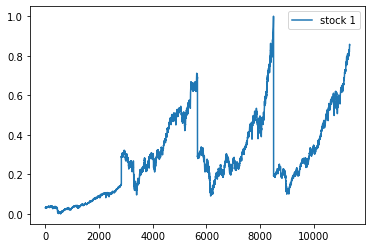

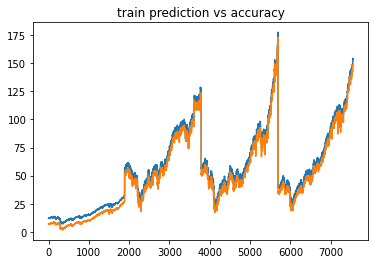

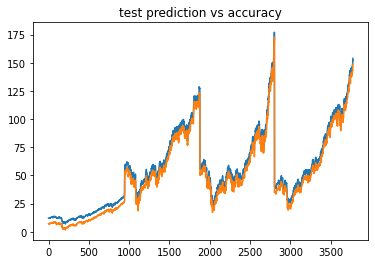

In [33]:
#TODO: Graph of full prediction

plt.plot(y, label = "stock 1")
plt.legend()
plt.show()

plt.plot(trainPredict[:,0])
plt.plot(trainY[0]-5)
plt.title("train prediction vs accuracy")
plt.show()

plt.plot(testPredict[:,0])
plt.plot(testY[0]-5)
plt.title("test prediction vs accuracy")
plt.show()

3777
[ 11.95   12.014  11.941 ... 151.92  152.39  153.81 ]
135.79138411548797


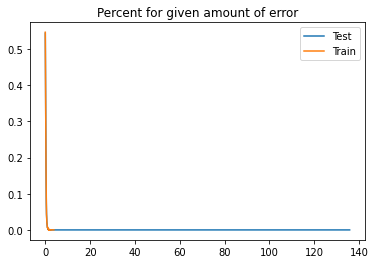

In [34]:
#Graph RMSE

te_diff = []
tr_diff = []
i , j=0 , 0

#Calc y_act - y_pred
for i in range(len(trainY[0])):
    te_diff.append((trainY[0][i] -trainPredict[i, 0])**2)
print(len(testY[0]))
j = 0
for j in range(len(testY[0])):
    tr_diff.append((testY[0][j] -testPredict[j, 0])**2)
    
#RMSE
print(max(testY))
te_RMSE = np.sqrt(np.around(te_diff,decimals = 1))
tr_RMSE = np.sqrt(np.around(tr_diff,decimals = 1))

print(max(te_RMSE))
#Get unique counts
te_poss, te_counts = np.unique(te_RMSE, return_counts = True)
tr_poss, tr_counts = np.unique(tr_RMSE, return_counts = True)

#Normalize counts (0 to 1)
te_counts = norm(te_counts)
tr_counts = norm(tr_counts)

#Plot
plt.plot(te_poss,te_counts, label = "Test")
plt.plot(tr_poss, tr_counts, label = "Train")
plt.title("Percent for given amount of error")
plt.legend()
plt.show()